In [125]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('./covid_worldwide.csv')
df.dropna(inplace=True)
df.drop(columns='Serial Number', inplace=True)
df = df.apply(lambda x: x.str.replace(',', ''))
df[['Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']] = df[[
    'Total Cases', 'Total Deaths', 'Total Recovered', 'Active Cases', 'Total Test', 'Population']].astype('int64')
df

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,104196861,1132935,101322779,1741147,1159832679,334805269
1,India,44682784,530740,44150289,1755,915265788,1406631776
2,France,39524311,164233,39264546,95532,271490188,65584518
3,Germany,37779833,165711,37398100,216022,122332384,83883596
4,Brazil,36824580,697074,35919372,208134,63776166,215353593
...,...,...,...,...,...,...,...
217,Anguilla,3904,12,3879,13,51382,15230
218,Macao,3488,120,3357,11,7850,667490
219,Saint Pierre Miquelon,3452,2,2449,1001,25400,5759
220,Wallis and Futuna,3427,7,438,2982,20508,10982


## Lima Negara Teratas Dengan Kasus Covid-19 Tertinggi

<Axes: xlabel='Country', ylabel='Total Cases'>

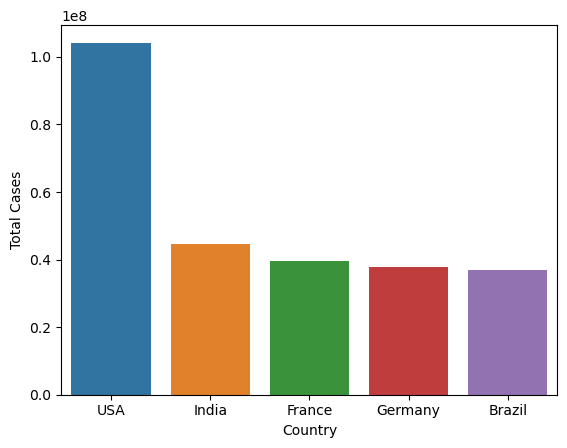

In [126]:
dc = df[['Country', 'Total Cases']]
topCasesTop5 = dc.sort_values(by='Total Cases', ascending=False).head(5)
sns.barplot(data=topCasesTop5, x='Country', y='Total Cases')

## Persentase Angka Kematian Tertinggi Kasus Covid-19